In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Zomato_data.csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [6]:
df.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

Надо изменить колонку rate, сейчас у неё тип object, надо сделать float

In [16]:
df['rate'] = df['rate'].str.replace('/5', '')
df['rate']

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: object

In [17]:
df['rate'].astype('float')

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: float64

Смотрим на данные и проверяем есть ли пустые значения

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


Посмотрим какие типы ресторанов и их количество

Text(0.5, 0, 'Type of restaurant')

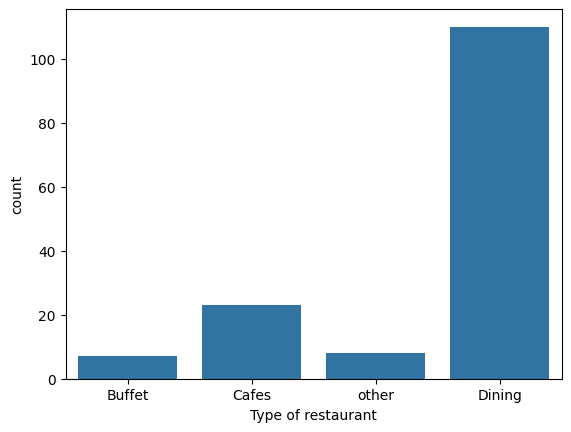

In [25]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurant")

Теперь посмотрим какие рестораны преподчитают клиенты

In [27]:
gr_data = df.groupby('listed_in(type)')['votes'].sum()
res = pd.DataFrame({'votes': gr_data})

res

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0, 0.5, 'Votes')

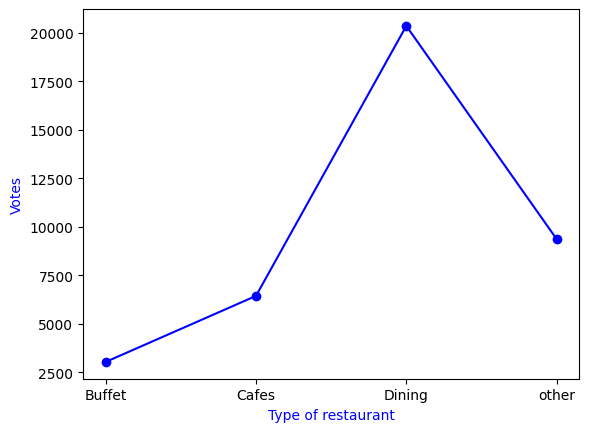

In [30]:
plt.plot(res, c='blue', marker="o")
plt.xlabel("Type of restaurant", c='blue')
plt.ylabel("Votes", c='blue')

По этому графику видно, что люди преподчитают тип ресторана "Dining"

Теперь посмотрим название ресторна, получившего максимальное количество голосов

In [32]:
max_vote = df['votes'].max()
rest_with_max_vote = df.loc[df['votes'] == max_vote, "name"]
print(f'Ресторан с максимальным количеством голосов: {rest_with_max_vote}')

Ресторан с максимальным количеством голосов: 38    Empire Restaurant
Name: name, dtype: object


Расмотрим столбец,показывающий есть ли возможность online заказа или нет

<Axes: xlabel='online_order', ylabel='count'>

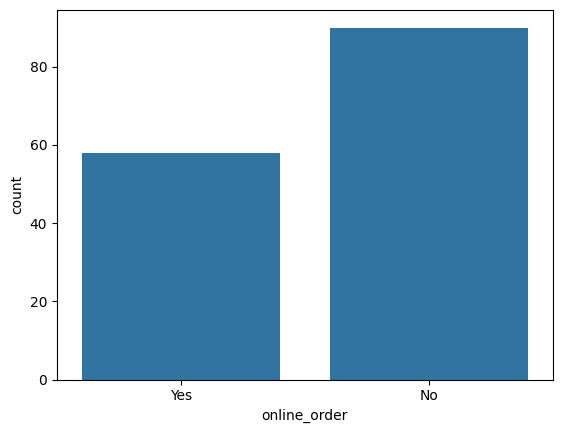

In [33]:
sns.countplot(x=df['online_order'])

По данному графику видно, что большая чвсть ресторанов не принимают online-заказы

Проверим, получают ли online-заказы более высокие оценки, чем офлайн-заказы

<Axes: xlabel='online_order', ylabel='rate'>

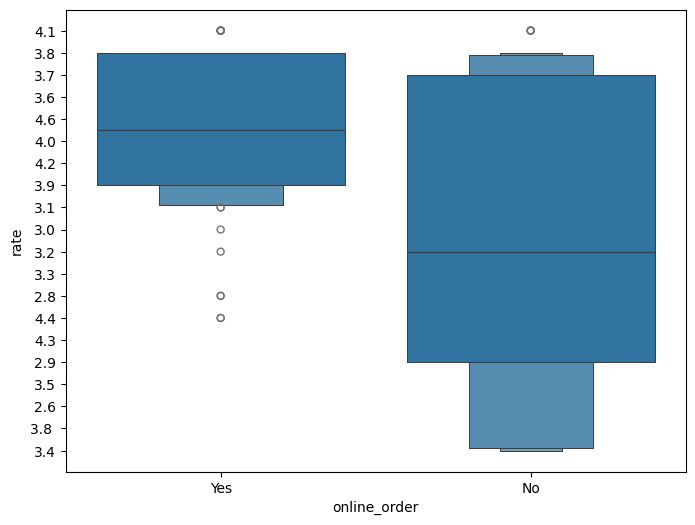

In [48]:
plt.figure(figsize=(8, 6))
sns.boxenplot(x = 'online_order', y = 'rate', data = df)

Теперь посмотрим оценки ресторанов

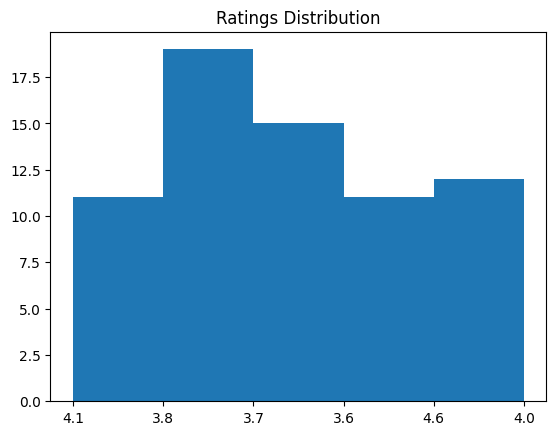

In [44]:
plt.hist(df['rate'], bins=[0, 1, 2, 3, 4, 5])
plt.title('Ratings Distribution')
plt.show()

Посмотри с какой стоимостью пары предпочитают рестораны

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

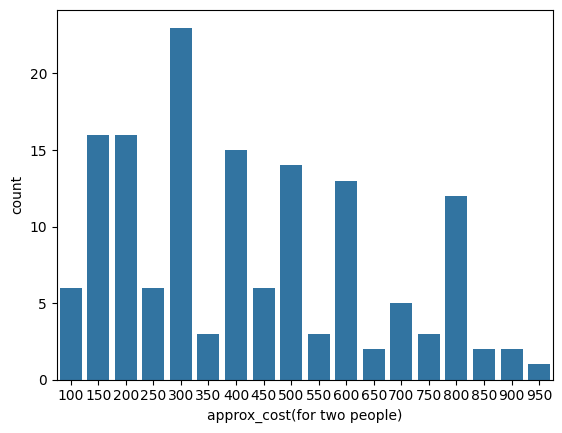

In [45]:
couple_rest = df['approx_cost(for two people)']
sns.countplot(x=couple_rest)

По графику видим, что большинство пар предпочитатают рестораны с приблизительной стоимостью 300

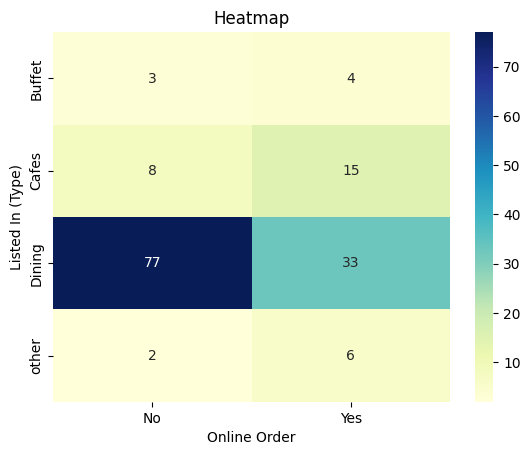

In [49]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

Из этого графика можно сделать следующие выводы рестораны в основном принимают офлайн-заказы, тогда как кафе в основном принимают онлайн-заказы. Это говорит о том, что клиенты предпочитают делать заказы лично в ресторанах, но предпочитают онлайн-заказы в кафе.